<a href="https://colab.research.google.com/github/Sayak86/DeepLearning/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load CIFAR10 and Train Test Split
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# Define batches,classes
num_classes = 10
batch_size = 32
epochs = 50

<function matplotlib.pyplot.show(close=None, block=None)>

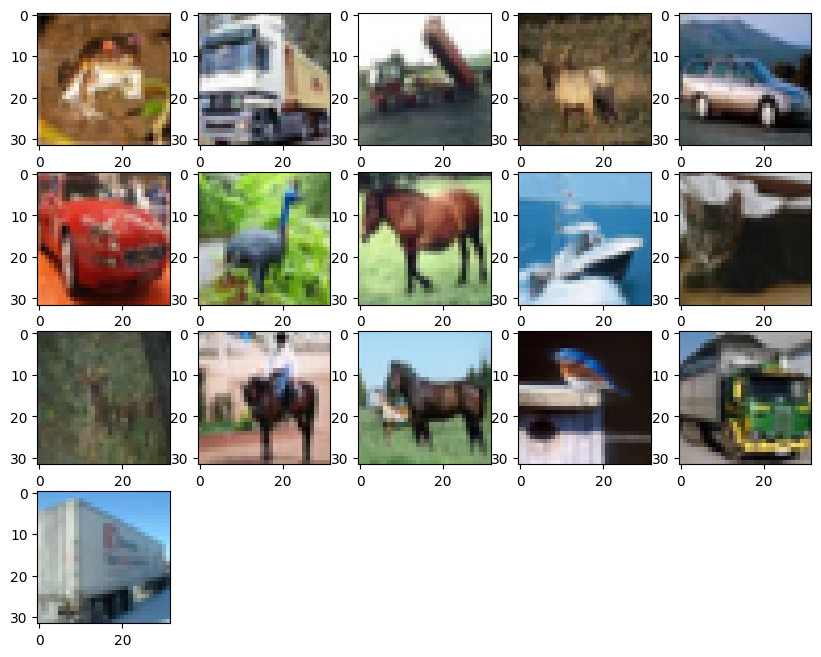

In [ ]:
fig = plt.figure(figsize = (10,10))
for i in range(16):
  ax = fig.add_subplot(5,5,i+1)
  ax.imshow(X_train[i])
plt.show

In [ ]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# Compile the model
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255


In [ ]:
# Train the model

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 16s 7ms/step - loss: 2.1017 - accuracy: 0.2216 - val_loss: 1.8245 - val_accuracy: 0.3623
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7644 - accuracy: 0.3586 - val_loss: 1.6190 - val_accuracy: 0.4185
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6053 - accuracy: 0.4143 - val_loss: 1.4695 - val_accuracy: 0.4673
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4880 - accuracy: 0.4599 - val_loss: 1.3932 - val_accuracy: 0.4996
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3976 - accuracy: 0.4958 - val_loss: 1.3092 - val_accuracy: 0.5288
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3305 - accuracy: 0.5227 - val_loss: 1.2106 - val_accuracy: 0.5662
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2755 - accuracy: 0.5412 - val_loss: 1.1830 - val_accura

In [ ]:
# Add Dropout , Batch Normalization after every conv layer
# Also add one more block of Conv layer
from keras.layers import BatchNormalization
from keras.regularizers import l2
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# Compile the model
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 20s 9ms/step - loss: 5.5341 - accuracy: 0.3810 - val_loss: 4.0346 - val_accuracy: 0.5207
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 3.3392 - accuracy: 0.5271 - val_loss: 2.6492 - val_accuracy: 0.5727
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 2.2340 - accuracy: 0.5928 - val_loss: 1.8728 - val_accuracy: 0.6129
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6327 - accuracy: 0.6383 - val_loss: 1.5103 - val_accuracy: 0.6236
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2878 - accuracy: 0.6695 - val_loss: 1.1879 - val_accuracy: 0.6726
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0901 - accuracy: 0.6912 - val_loss: 1.0126 - val_accuracy: 0.7030
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9628 - accuracy: 0.7125 - val_loss: 0.9216 - val_ac